# Scraping of Data from Amazon website using requests & Beautifulsoup

In [34]:
from bs4 import BeautifulSoup
import requests

In [35]:
url = "https://www.amazon.in/boAt-Smartwatch-Multiple-Monitoring-Resistance/product-reviews/B096VF5YYF/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"
reviewlist = []

In [36]:
def get_soup(url):
    r = requests.get("https://www.amazon.in/boAt-Smartwatch-Multiple-Monitoring-Resistance/product-reviews/B096VF5YYF/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews")
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

# Extracting title, ratings & Reviews

In [37]:
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'body': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [38]:
soup=get_soup("https://www.amazon.in/boAt-Smartwatch-Multiple-Monitoring-Resistance/product-reviews/B096VF5YYF/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews")
get_reviews(soup)
print(len(reviewlist))

0


# Getting reviews from all pages

In [39]:
for x in range(1,999):
    soup = get_soup(f"https://www.amazon.in/boAt-Smartwatch-Multiple-Monitoring-Resistance/product-reviews/B096VF5YYF/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews")
    print(f'Getting page: {x}')
    get_reviews(soup)
    print(len(reviewlist))
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

Getting page: 1
10
Getting page: 2
20
Getting page: 3
30
Getting page: 4
40
Getting page: 5
40
Getting page: 6
50
Getting page: 7
60
Getting page: 8
70
Getting page: 9
80
Getting page: 10
90
Getting page: 11
100
Getting page: 12
100
Getting page: 13
100
Getting page: 14
110
Getting page: 15
120
Getting page: 16
130
Getting page: 17
130
Getting page: 18
130
Getting page: 19
130
Getting page: 20
140
Getting page: 21
150
Getting page: 22
160
Getting page: 23
160
Getting page: 24
170
Getting page: 25
180
Getting page: 26
180
Getting page: 27
190
Getting page: 28
200
Getting page: 29
200
Getting page: 30
200
Getting page: 31
210
Getting page: 32
210
Getting page: 33
220
Getting page: 34
220
Getting page: 35
230
Getting page: 36
240
Getting page: 37
250
Getting page: 38
260
Getting page: 39
260
Getting page: 40
270
Getting page: 41
280
Getting page: 42
290
Getting page: 43
300
Getting page: 44
300
Getting page: 45
310
Getting page: 46
310
Getting page: 47
310
Getting page: 48
320
Getting pag

In [40]:
# Converting to dataframe
import pandas as pd
df = pd.DataFrame(reviewlist)

In [41]:
df

,title,rating,body
0,Good product if Your budget is only 3000,3.0,1.Display clearity is not as expected2. Batter...
1,Good product at reasonable price,4.0,Most functions (except Alexa) are working as e...
2,Nice watch,4.0,I m not sure about data authentication but nic...
3,Don't buy it.,1.0,It is a new product and it has so many bugs. I...
4,Best Budget watch,5.0,The media could not be loaded.\n ...
...,...,...,...
6225,Problem with display,1.0,The media could not be loaded.\n ...
6226,Alexa is not working,1.0,I am unable to connect alexa through boat wave...
6227,"Dissappointed. Alexa is an eye wash, SPO2 high...",1.0,Very ordinary watch. Packing looks like a chea...
6228,Best Budget Fully loaded Smart Watch,5.0,Boat xtend 1st review. Smart Watch working ver...


In [42]:
df.to_csv('boat_watch.csv')

# Data preprocessing

In [43]:
import spacy
import nltk
import re
nltk.download('stopwords')
#import nltk Stopwords
stopwords = nltk.corpus.stopwords.words('english')
from nltk.stem import PorterStemmer
porter = PorterStemmer()
# Initialize spacy ‘en’ model, keeping only component needed for lemmatization and creating an engine:
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ajay\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [44]:
def clean_text(text):
    text=re.sub('[^a-zA-Z]', " ", text)                                  # remove punctuation 
    text=text.lower()                                                    # coverted lower case
    text=text.split()                                                    # split by word
    text=[porter.stem(word)for word in text if word not in stopwords]    # remove stopwords 
    text=' '.join(text)
    return text

In [45]:
text=df.iloc[0]["body"]
text

'1.Display clearity is not as expected2. Battery performance is poor 2Days3. SPO2, Heart & Step counting is inaccurate.4.Looks & Build quality is awesome.'

In [46]:
text1 = clean_text(df.iloc[0]["body"])
text1

'display cleariti expect batteri perform poor day spo heart step count inaccur look build qualiti awesom'

# Data Cleaning

In [47]:
df['review_cleaned']=df['body'].apply(clean_text)

In [48]:
df.dropna(inplace=True)

In [49]:
df

,title,rating,body,review_cleaned
0,Good product if Your budget is only 3000,3.0,1.Display clearity is not as expected2. Batter...,display cleariti expect batteri perform poor d...
1,Good product at reasonable price,4.0,Most functions (except Alexa) are working as e...,function except alexa work expect pro larger s...
2,Nice watch,4.0,I m not sure about data authentication but nic...,sure data authent nice watchin reason price
3,Don't buy it.,1.0,It is a new product and it has so many bugs. I...,new product mani bug got product th juli st di...
4,Best Budget watch,5.0,The media could not be loaded.\n ...,media could load use watch month bought first ...
...,...,...,...,...
6225,Problem with display,1.0,The media could not be loaded.\n ...,media could load bought watch juli th high exp...
6226,Alexa is not working,1.0,I am unable to connect alexa through boat wave...,unabl connect alexa boat wave app tri connect ...
6227,"Dissappointed. Alexa is an eye wash, SPO2 high...",1.0,Very ordinary watch. Packing looks like a chea...,ordinari watch pack look like cheap product qr...
6228,Best Budget Fully loaded Smart Watch,5.0,Boat xtend 1st review. Smart Watch working ver...,boat xtend st review smart watch work smooth c...


In [50]:
from wordcloud import WordCloud
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
%matplotlib inline
ip_rev_string = " ".join(df['review_cleaned'])

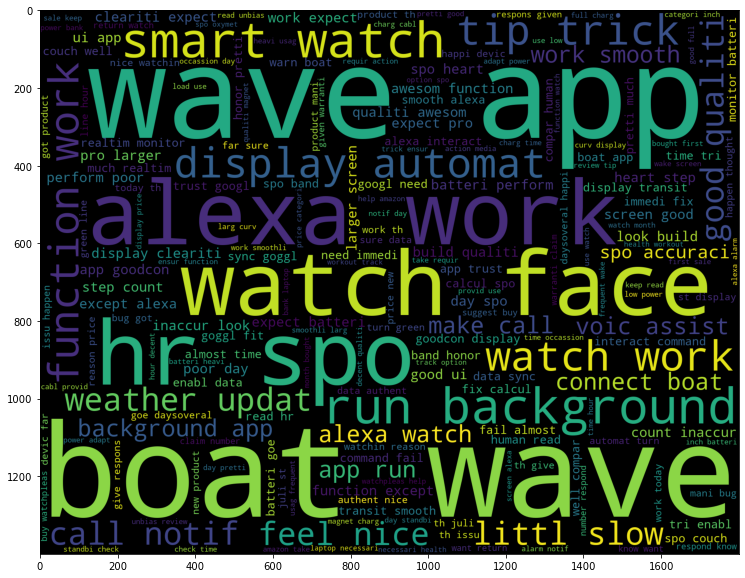

In [51]:
wordcloud_ip = WordCloud(background_color='black',width=1800,height=1400).generate(ip_rev_string)
plt.figure( figsize=(20,10))
plt.imshow(wordcloud_ip)

# Sentiment Analysis Using Vader Lexicon

In [52]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Ajay\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [53]:
# function to print sentiments
# of the sentence.
def sentiment_scores(sentence):
# Create a SentimentIntensityAnalyzer object.
    sid = SentimentIntensityAnalyzer()
# polarity_scores method of SentimentIntensityAnalyzer
# oject gives a sentiment dictionary.
# which contains pos, neg, neu, and compound scores.
    sentiment_dict = sid.polarity_scores(sentence)
    print("Overall sentiment dictionary is : ", sentiment_dict)
    print("sentence was rated as ", sentiment_dict['neg']*100, "% Negative")
    print("sentence was rated as ", sentiment_dict['neu']*100, "% Neutral")
    print("sentence was rated as ", sentiment_dict['pos']*100, "% Positive")
    print("Sentence Overall Rated As", end = " ")
    # decide sentiment as positive, negative and neutral
    if sentiment_dict['compound'] > 0 :
        print("Positive")
    elif sentiment_dict['compound'] < 0 :
        print("Negative")
    else :
        print("Neutral")

In [54]:
sentiment_scores(text1)

Overall sentiment dictionary is :  {'neg': 0.171, 'neu': 0.829, 'pos': 0.0, 'compound': -0.4767}
sentence was rated as  17.1 % Negative
sentence was rated as  82.89999999999999 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Negative


In [55]:
sid = SentimentIntensityAnalyzer()

In [56]:
df["polarity_score"] = df["review_cleaned"].apply(lambda review:sid.polarity_scores(review))
df.head()

,title,rating,body,review_cleaned,polarity_score
0,Good product if Your budget is only 3000,3.0,1.Display clearity is not as expected2. Batter...,display cleariti expect batteri perform poor d...,"{'neg': 0.171, 'neu': 0.829, 'pos': 0.0, 'comp..."
1,Good product at reasonable price,4.0,Most functions (except Alexa) are working as e...,function except alexa work expect pro larger s...,"{'neg': 0.071, 'neu': 0.726, 'pos': 0.203, 'co..."
2,Nice watch,4.0,I m not sure about data authentication but nic...,sure data authent nice watchin reason price,"{'neg': 0.0, 'neu': 0.495, 'pos': 0.505, 'comp..."
3,Don't buy it.,1.0,It is a new product and it has so many bugs. I...,new product mani bug got product th juli st di...,"{'neg': 0.0, 'neu': 0.854, 'pos': 0.146, 'comp..."
4,Best Budget watch,5.0,The media could not be loaded.\n ...,media could load use watch month bought first ...,"{'neg': 0.065, 'neu': 0.834, 'pos': 0.101, 'co..."


In [57]:
df["Compound_polarity_Score"]  = df['polarity_score'].apply(lambda x: x['compound'])
df.head()

,title,rating,body,review_cleaned,polarity_score,Compound_polarity_Score
0,Good product if Your budget is only 3000,3.0,1.Display clearity is not as expected2. Batter...,display cleariti expect batteri perform poor d...,"{'neg': 0.171, 'neu': 0.829, 'pos': 0.0, 'comp...",-0.4767
1,Good product at reasonable price,4.0,Most functions (except Alexa) are working as e...,function except alexa work expect pro larger s...,"{'neg': 0.071, 'neu': 0.726, 'pos': 0.203, 'co...",0.8442
2,Nice watch,4.0,I m not sure about data authentication but nic...,sure data authent nice watchin reason price,"{'neg': 0.0, 'neu': 0.495, 'pos': 0.505, 'comp...",0.6249
3,Don't buy it.,1.0,It is a new product and it has so many bugs. I...,new product mani bug got product th juli st di...,"{'neg': 0.0, 'neu': 0.854, 'pos': 0.146, 'comp...",0.6124
4,Best Budget watch,5.0,The media could not be loaded.\n ...,media could load use watch month bought first ...,"{'neg': 0.065, 'neu': 0.834, 'pos': 0.101, 'co...",0.9661


In [58]:
df=df[['review_cleaned',"polarity_score","Compound_polarity_Score"]]
df

,review_cleaned,polarity_score,Compound_polarity_Score
0,display cleariti expect batteri perform poor d...,"{'neg': 0.171, 'neu': 0.829, 'pos': 0.0, 'comp...",-0.4767
1,function except alexa work expect pro larger s...,"{'neg': 0.071, 'neu': 0.726, 'pos': 0.203, 'co...",0.8442
2,sure data authent nice watchin reason price,"{'neg': 0.0, 'neu': 0.495, 'pos': 0.505, 'comp...",0.6249
3,new product mani bug got product th juli st di...,"{'neg': 0.0, 'neu': 0.854, 'pos': 0.146, 'comp...",0.6124
4,media could load use watch month bought first ...,"{'neg': 0.065, 'neu': 0.834, 'pos': 0.101, 'co...",0.9661
...,...,...,...
6225,media could load bought watch juli th high exp...,"{'neg': 0.103, 'neu': 0.897, 'pos': 0.0, 'comp...",-0.2924
6226,unabl connect alexa boat wave app tri connect ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
6227,ordinari watch pack look like cheap product qr...,"{'neg': 0.076, 'neu': 0.793, 'pos': 0.13, 'com...",0.2263
6228,boat xtend st review smart watch work smooth c...,"{'neg': 0.02, 'neu': 0.793, 'pos': 0.187, 'com...",0.9349


In [59]:
df["Review_type"] = df["Compound_polarity_Score"].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))
df.head()

C:\Users\Ajay\AppData\Local\Temp\ipykernel_24712\3914259936.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Review_type"] = df["Compound_polarity_Score"].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))


,review_cleaned,polarity_score,Compound_polarity_Score,Review_type
0,display cleariti expect batteri perform poor d...,"{'neg': 0.171, 'neu': 0.829, 'pos': 0.0, 'comp...",-0.4767,negative
1,function except alexa work expect pro larger s...,"{'neg': 0.071, 'neu': 0.726, 'pos': 0.203, 'co...",0.8442,positive
2,sure data authent nice watchin reason price,"{'neg': 0.0, 'neu': 0.495, 'pos': 0.505, 'comp...",0.6249,positive
3,new product mani bug got product th juli st di...,"{'neg': 0.0, 'neu': 0.854, 'pos': 0.146, 'comp...",0.6124,positive
4,media could load use watch month bought first ...,"{'neg': 0.065, 'neu': 0.834, 'pos': 0.101, 'co...",0.9661,positive


In [60]:
df.Review_type.value_counts()

positive    4361
negative    1246
neutral      623
Name: Review_type, dtype: int64

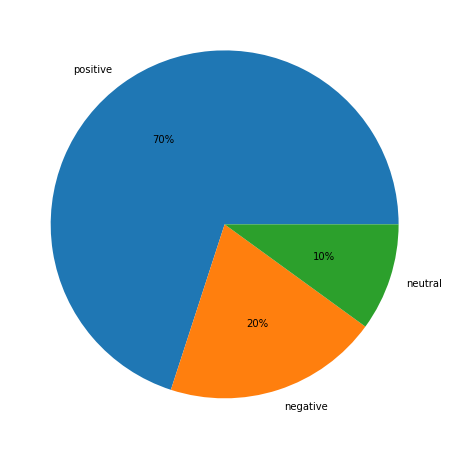

In [61]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.pie(df["Review_type"].value_counts(), labels = df["Review_type"].value_counts().index, autopct="%.0f%%")
plt.show()

# Sentiment Analysis Using TextBlob

In [62]:
df1=df[['review_cleaned']]
df1.dropna(inplace=True)
df1

C:\Users\Ajay\AppData\Local\Temp\ipykernel_24712\2999364153.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(inplace=True)


,review_cleaned
0,display cleariti expect batteri perform poor d...
1,function except alexa work expect pro larger s...
2,sure data authent nice watchin reason price
3,new product mani bug got product th juli st di...
4,media could load use watch month bought first ...
...,...
6225,media could load bought watch juli th high exp...
6226,unabl connect alexa boat wave app tri connect ...
6227,ordinari watch pack look like cheap product qr...
6228,boat xtend st review smart watch work smooth c...


In [63]:
from textblob import TextBlob
def get_polarity(review):
    return TextBlob(review).sentiment.polarity

In [64]:
df1['TextBlob_polarity']=df1['review_cleaned'].apply(get_polarity)
df1

C:\Users\Ajay\AppData\Local\Temp\ipykernel_24712\1826192324.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['TextBlob_polarity']=df1['review_cleaned'].apply(get_polarity)


,review_cleaned,TextBlob_polarity
0,display cleariti expect batteri perform poor d...,-0.400000
1,function except alexa work expect pro larger s...,0.162500
2,sure data authent nice watchin reason price,0.550000
3,new product mani bug got product th juli st di...,0.012121
4,media could load use watch month bought first ...,0.098523
...,...,...
6225,media could load bought watch juli th high exp...,0.180000
6226,unabl connect alexa boat wave app tri connect ...,0.000000
6227,ordinari watch pack look like cheap product qr...,0.400000
6228,boat xtend st review smart watch work smooth c...,0.257143


In [65]:
def get_Analysis(score):
    if score < 0:
        return 'Negative'
    elif score==0:
        return 'Neutral'
    else:
        return 'Positive'
    

In [66]:
df1['TextBlob_Analysis']= df1['TextBlob_polarity'].apply(get_Analysis)
df1

C:\Users\Ajay\AppData\Local\Temp\ipykernel_24712\71252405.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['TextBlob_Analysis']= df1['TextBlob_polarity'].apply(get_Analysis)


,review_cleaned,TextBlob_polarity,TextBlob_Analysis
0,display cleariti expect batteri perform poor d...,-0.400000,Negative
1,function except alexa work expect pro larger s...,0.162500,Positive
2,sure data authent nice watchin reason price,0.550000,Positive
3,new product mani bug got product th juli st di...,0.012121,Positive
4,media could load use watch month bought first ...,0.098523,Positive
...,...,...,...
6225,media could load bought watch juli th high exp...,0.180000,Positive
6226,unabl connect alexa boat wave app tri connect ...,0.000000,Neutral
6227,ordinari watch pack look like cheap product qr...,0.400000,Positive
6228,boat xtend st review smart watch work smooth c...,0.257143,Positive


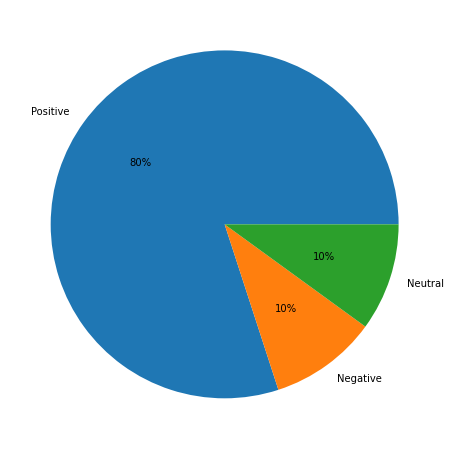

In [67]:
plt.figure(figsize=(10,8))
plt.pie(df1["TextBlob_Analysis"].value_counts(), labels = df1["TextBlob_Analysis"].value_counts().index, autopct="%.0f%%")
plt.show()